In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
budget = pd.read_csv('budgetandgross.csv')
print(budget)
general = pd.read_csv('allawards.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'budgetandgross.csv'

In [ ]:
budgetYears = budget[budget['year']>1999]
oscarYears = general[general['year_ceremony']>1999]
actor = oscarYears[oscarYears['category']=='ACTOR IN A LEADING ROLE']
actress = oscarYears[oscarYears['category']=='ACTRESS IN A LEADING ROLE']

In [ ]:
budgetActor = pd.merge(budgetYears, actor, how='inner', left_on='title', right_on='film')
budgetActress = pd.merge(budgetYears, actress, how='inner', left_on='title', right_on='film')

In [ ]:
import pandas as pd

# Load the datasets
oscar_award_df = pd.read_csv("All awards Oscar Data  - the_oscar_award.csv")
film_budgets_revenues_df = pd.read_csv("film budgets_revenues - Sheet1.csv")

# Filter the Oscars data for the years 2000 to 2023 and relevant categories
oscar_nominations_filtered = oscar_award_df[
    (oscar_award_df['year_film'] >= 2000) & 
    (oscar_award_df['year_film'] <= 2023) &
    (oscar_award_df['category'].isin(['BEST PICTURE', 'DIRECTING', 'ACTOR', 'ACTRESS']))
]

# Clean and prepare the film budgets and revenues data
film_budgets_revenues_df_cleaned = film_budgets_revenues_df[['year', 'category', 'nominee', 'domestic box office rev', 'international box office', 'film budget', 'winner?']].copy()
film_budgets_revenues_df_cleaned.columns = ['year_film', 'category', 'film', 'domestic_gross', 'international_gross', 'budget', 'winner']
for col in ['domestic_gross', 'international_gross', 'budget']:
    film_budgets_revenues_df_cleaned[col] = pd.to_numeric(film_budgets_revenues_df_cleaned[col].str.replace('[\$,]', '', regex=True), errors='coerce')

# Calculate net revenue
film_budgets_revenues_df_cleaned['net_revenue'] = (film_budgets_revenues_df_cleaned['domestic_gross'] + film_budgets_revenues_df_cleaned['international_gross']) - film_budgets_revenues_df_cleaned['budget']

# Export the final cleaned and merged dataset
final_dataset_path = 'final_oscar_nominees_dataset_2000_to_2023.csv'
film_budgets_revenues_df_cleaned.to_csv(final_dataset_path, index=False)

print(f"The final dataset has been saved to {final_dataset_path}")


The final dataset has been saved to final_oscar_nominees_dataset_2000_to_2023.csv


In [ ]:
file = pd.read_csv("final_oscar_nominees_dataset_2000_to_2023.csv")

display(file)

,year_film,category,film,domestic_gross,international_gross,budget,winner,net_revenue
0,2000,best picture,American Beauty,130058047.0,226200000.0,15000000.0,True,341258047.0
1,2000,best picture,Cider House Rules,57547209.0,31000000.0,NaN,False,NaN
2,2000,best picture,The Green Mile,136801374.0,150000000.0,60000000.0,False,226801374.0
3,2000,best picture,The Insider,29089912.0,31200000.0,90000000.0,False,-29710088.0
4,2000,best picture,The Sixth Sense,293506292.0,379300140.0,40000000.0,False,632806432.0
...,...,...,...,...,...,...,...,...
180,2024,best picture,Killers of The Flower Moon,NaN,NaN,NaN,False,NaN
181,2024,best picture,Maestro,NaN,NaN,NaN,False,NaN
182,2024,best picture,Past Lives,NaN,NaN,NaN,False,NaN
183,2024,best picture,Poor Things,NaN,NaN,NaN,False,NaN


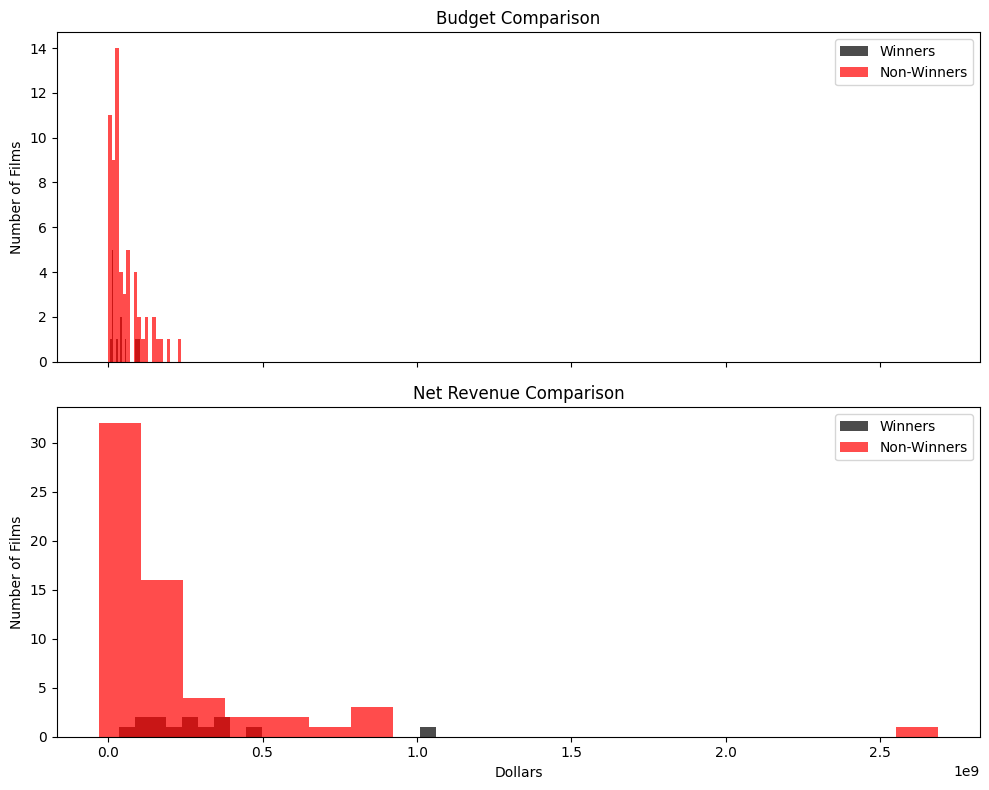

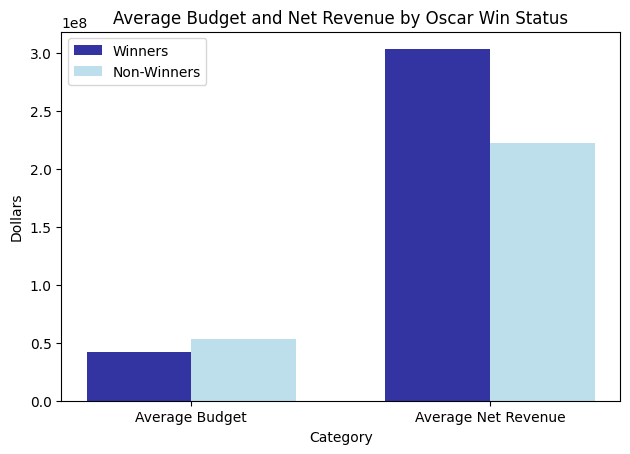

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the final cleaned and merged dataset
film_budgets_revenues_df_cleaned = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Calculate average budget and net revenue for winners and non-winners
average_budget_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['budget'].mean()
average_net_revenue_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['net_revenue'].mean()

average_budget_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['budget'].mean()
average_net_revenue_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['net_revenue'].mean()

# Data to plot
n_groups = 2
winners_data = (average_budget_winners, average_net_revenue_winners)
non_winners_data = (average_budget_non_winners, average_net_revenue_non_winners)

# Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index, winners_data, bar_width,
alpha=opacity, color='darkblue', label='Winners')

rects2 = ax.bar(index + bar_width, non_winners_data, bar_width,
alpha=opacity, color='lightblue', label='Non-Winners')

ax.set_xlabel('Category')
ax.set_ylabel('Dollars')
ax.set_title('Average Budget and Net Revenue by Oscar Win Status')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Average Budget', 'Average Net Revenue'))
ax.legend()

plt.tight_layout()
plt.show()

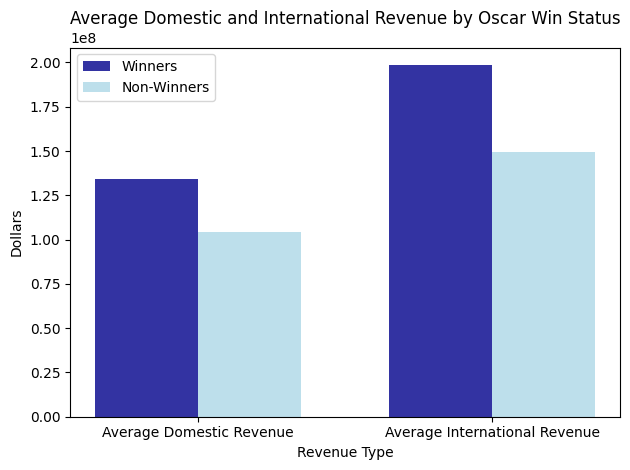

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the final cleaned and merged dataset
film_budgets_revenues_df_cleaned = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Calculate average domestic and international revenue for winners and non-winners
average_domestic_revenue_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['domestic_gross'].mean()
average_international_revenue_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['international_gross'].mean()

average_domestic_revenue_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['domestic_gross'].mean()
average_international_revenue_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['international_gross'].mean()

# Data to plot
n_groups = 2
winners_data = (average_domestic_revenue_winners, average_international_revenue_winners)
non_winners_data = (average_domestic_revenue_non_winners, average_international_revenue_non_winners)

# Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index, winners_data, bar_width,
                alpha=opacity, color='darkblue', label='Winners')

rects2 = ax.bar(index + bar_width, non_winners_data, bar_width,
                alpha=opacity, color='lightblue', label='Non-Winners')

ax.set_xlabel('Revenue Type')
ax.set_ylabel('Dollars')
ax.set_title('Average Domestic and International Revenue by Oscar Win Status')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Average Domestic Revenue', 'Average International Revenue'))
ax.legend()

plt.tight_layout()
plt.show()

import pandas as pd

# Load the final cleaned and merged dataset
film_budgets_revenues_df_cleaned = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Calculate average budget for winners and non-winners
average_budget_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['budget'].mean()
average_budget_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['budget'].mean()

# Calculate average net revenue for winners and non-winners
average_net_revenue_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['net_revenue'].mean()
average_net_revenue_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['net_revenue'].mean()

# Print the results
print(f"Average Budget for Winners: ${average_budget_winners:,.2f}")
print(f"Average Budget for Non-Winners: ${average_budget_non_winners:,.2f}\n")
print(f"Average Net Revenue for Winners: ${average_net_revenue_winners:,.2f}")
print(f"Average Net Revenue for Non-Winners: ${average_net_revenue_non_winners:,.2f}")

In [ ]:
import pandas as pd

# Load the final cleaned and merged dataset
film_budgets_revenues_df_cleaned = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Calculate average budget for winners and non-winners
average_budget_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['budget'].mean()
average_budget_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['budget'].mean()

# Calculate average net revenue for winners and non-winners
average_net_revenue_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['net_revenue'].mean()
average_net_revenue_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['net_revenue'].mean()

# Calculate average domestic box office sales for winners and non-winners
average_domestic_sales_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['domestic_gross'].mean()
average_domestic_sales_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['domestic_gross'].mean()

# Calculate average international box office sales for winners and non-winners
average_international_sales_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['international_gross'].mean()
average_international_sales_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['international_gross'].mean()

# Print the results
print(f"Average Budget for Winners: ${average_budget_winners:,.2f}")
print(f"Average Budget for Non-Winners: ${average_budget_non_winners:,.2f}\n")
print(f"Average Net Revenue for Winners: ${average_net_revenue_winners:,.2f}")
print(f"Average Net Revenue for Non-Winners: ${average_net_revenue_non_winners:,.2f}\n")
print(f"Average Domestic Box Office Sales for Winners: ${average_domestic_sales_winners:,.2f}")
print(f"Average Domestic Box Office Sales for Non-Winners: ${average_domestic_sales_non_winners:,.2f}\n")
print(f"Average International Box Office Sales for Winners: ${average_international_sales_winners:,.2f}")
print(f"Average International Box Office Sales for Non-Winners: ${average_international_sales_non_winners:,.2f}")

Average Budget for Winners: $42,000,000.00
Average Budget for Non-Winners: $52,825,247.43

Average Net Revenue for Winners: $303,045,463.08
Average Net Revenue for Non-Winners: $222,494,578.64

Average Domestic Box Office Sales for Winners: $134,157,751.43
Average Domestic Box Office Sales for Non-Winners: $104,216,182.11

Average International Box Office Sales for Winners: $198,500,731.43
Average International Box Office Sales for Non-Winners: $149,480,334.46


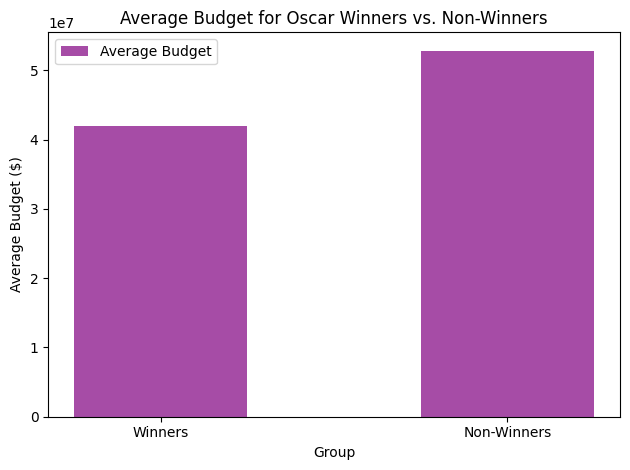

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the final cleaned and merged dataset
film_budgets_revenues_df_cleaned = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Calculate average budget for winners and non-winners
average_budget_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['budget'].mean()
average_budget_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['budget'].mean()

# Data to plot
categories = ['Winners', 'Non-Winners']
average_budgets = [average_budget_winners, average_budget_non_winners]

# Create plot
fig, ax = plt.subplots()
bar_positions = np.arange(len(categories))
bar_width = 0.5
opacity = 0.7

bars = ax.bar(bar_positions, average_budgets, bar_width,
              alpha=opacity, color='purple', label='Average Budget')

ax.set_xlabel('Group')
ax.set_ylabel('Average Budget ($)')
ax.set_title('Average Budget for Oscar Winners vs. Non-Winners')
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

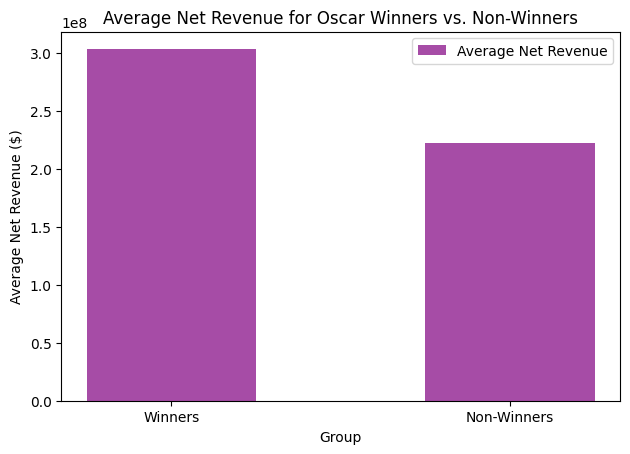

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the final cleaned and merged dataset
film_budgets_revenues_df_cleaned = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Calculate average net revenue for winners and non-winners
average_net_revenue_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == True]['net_revenue'].mean()
average_net_revenue_non_winners = film_budgets_revenues_df_cleaned[film_budgets_revenues_df_cleaned['winner'] == False]['net_revenue'].mean()

# Data to plot
categories = ['Winners', 'Non-Winners']
average_net_revenues = [average_net_revenue_winners, average_net_revenue_non_winners]

# Create plot
fig, ax = plt.subplots()
bar_positions = np.arange(len(categories))
bar_width = 0.5
opacity = 0.7

bars = ax.bar(bar_positions, average_net_revenues, bar_width,
              alpha=opacity, color='purple', label='Average Net Revenue')

ax.set_xlabel('Group')
ax.set_ylabel('Average Net Revenue ($)')
ax.set_title('Average Net Revenue for Oscar Winners vs. Non-Winners')
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


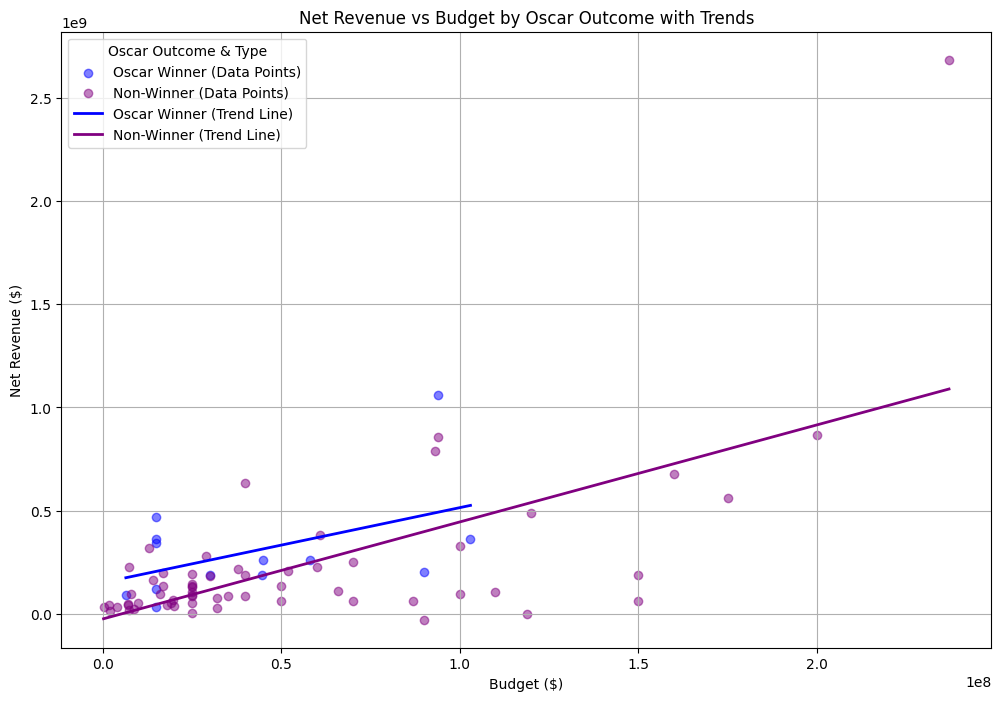

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the dataset
final_oscar_nominees = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Prepare the data
final_oscar_nominees_data = final_oscar_nominees[['budget', 'net_revenue', 'winner']].dropna(subset=['budget', 'net_revenue'])

# Separate the data into winners and non-winners
winners_data = final_oscar_nominees_data[final_oscar_nominees_data['winner'] == True]
non_winners_data = final_oscar_nominees_data[final_oscar_nominees_data['winner'] == False]

# Fit linear regression models for trend lines
winners_model = LinearRegression().fit(winners_data[['budget']], winners_data['net_revenue'])
non_winners_model = LinearRegression().fit(non_winners_data[['budget']], non_winners_data['net_revenue'])

# Generate predictions for the trend lines
winners_trend_x = np.linspace(winners_data['budget'].min(), winners_data['budget'].max(), 100)
winners_trend_y = winners_model.predict(winners_trend_x.reshape(-1, 1))
non_winners_trend_x = np.linspace(non_winners_data['budget'].min(), non_winners_data['budget'].max(), 100)
non_winners_trend_y = non_winners_model.predict(non_winners_trend_x.reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(winners_data['budget'], winners_data['net_revenue'], color='blue', alpha=0.5, label='Oscar Winner (Data Points)')
plt.scatter(non_winners_data['budget'], non_winners_data['net_revenue'], color='purple', alpha=0.5, label='Non-Winner (Data Points)')
plt.plot(winners_trend_x, winners_trend_y, color='blue', linewidth=2, label='Oscar Winner (Trend Line)')
plt.plot(non_winners_trend_x, non_winners_trend_y, color='purple', linewidth=2, label='Non-Winner (Trend Line)')
plt.title('Net Revenue vs Budget by Oscar Outcome with Trends')
plt.xlabel('Budget ($)')
plt.ylabel('Net Revenue ($)')
plt.legend(title="Oscar Outcome & Type")
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


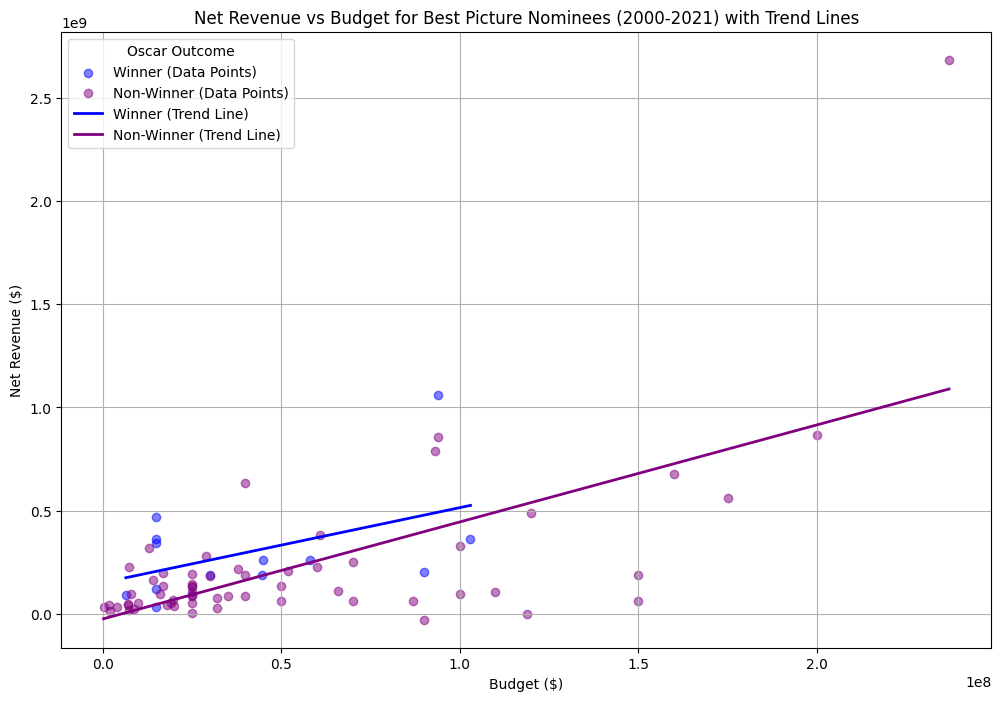

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
final_oscar_nominees = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Filter Best Picture nominees between 2000 and 2021
best_picture_data = final_oscar_nominees[
    (final_oscar_nominees['year_film'] >= 2000) & 
    (final_oscar_nominees['year_film'] <= 2021) & 
    (final_oscar_nominees['category'] == 'best picture')
]

# Prepare the data by removing rows with missing budget or net revenue
best_picture_data = best_picture_data[['budget', 'net_revenue', 'winner']].dropna()

# Separate the data into winners and non-winners
best_picture_winners = best_picture_data[best_picture_data['winner'] == True]
best_picture_non_winners = best_picture_data[best_picture_data['winner'] == False]

# Fit linear regression models for each group to get the trend lines
winner_model = LinearRegression().fit(best_picture_winners[['budget']], best_picture_winners['net_revenue'])
non_winner_model = LinearRegression().fit(best_picture_non_winners[['budget']], best_picture_non_winners['net_revenue'])

# Generate prediction data for the trend lines
x_winners = np.linspace(best_picture_winners['budget'].min(), best_picture_winners['budget'].max(), 100)
y_winners = winner_model.predict(x_winners.reshape(-1, 1))
x_non_winners = np.linspace(best_picture_non_winners['budget'].min(), best_picture_non_winners['budget'].max(), 100)
y_non_winners = non_winner_model.predict(x_non_winners.reshape(-1, 1))

# Plotting the scatter plot with trend lines
plt.figure(figsize=(12, 8))
plt.scatter(best_picture_winners['budget'], best_picture_winners['net_revenue'], color='blue', alpha=0.5, label='Winner (Data Points)')
plt.scatter(best_picture_non_winners['budget'], best_picture_non_winners['net_revenue'], color='purple', alpha=0.5, label='Non-Winner (Data Points)')
plt.plot(x_winners, y_winners, color='blue', label='Winner (Trend Line)', linewidth=2)
plt.plot(x_non_winners, y_non_winners, color='purple', label='Non-Winner (Trend Line)', linewidth=2)
plt.title('Net Revenue vs Budget for Best Picture Nominees (2000-2021) with Trend Lines')
plt.xlabel('Budget ($)')
plt.ylabel('Net Revenue ($)')
plt.legend(title="Oscar Outcome")
plt.grid(True)
plt.show()

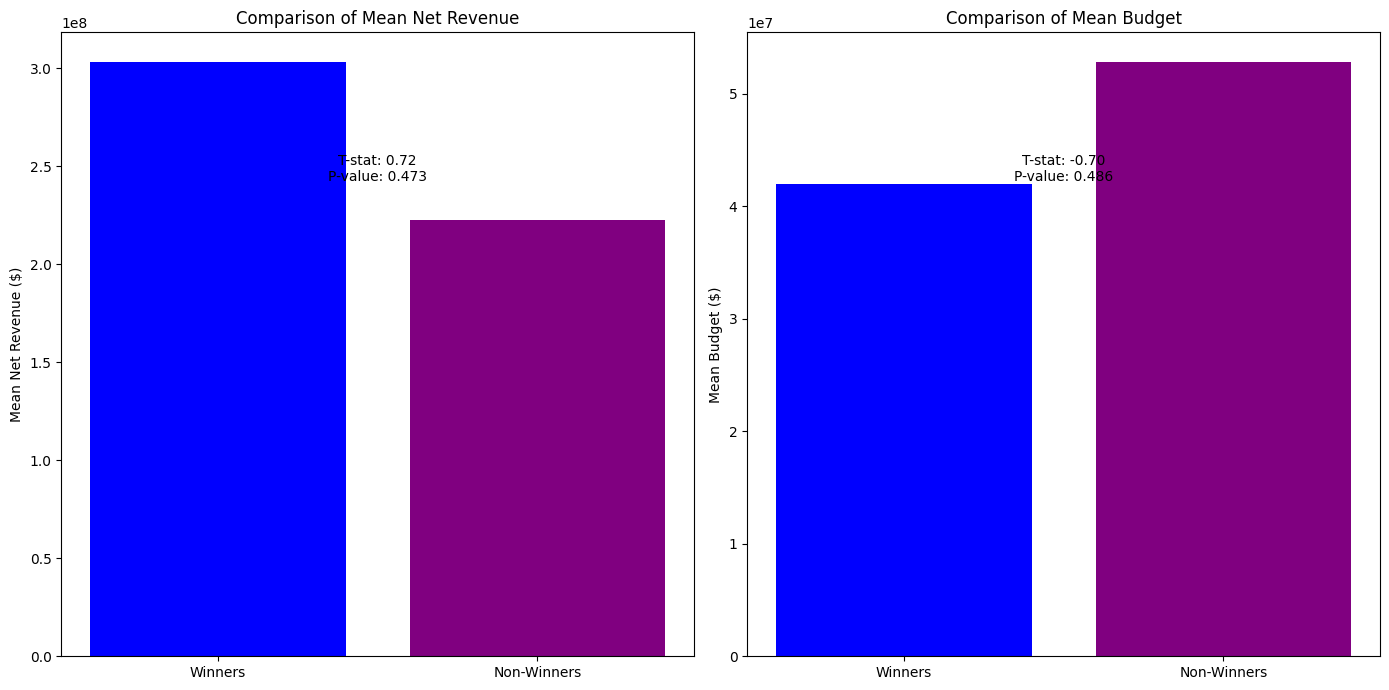

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
final_oscar_nominees = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Filter Best Picture nominees between 2000 and 2021
best_picture_data = final_oscar_nominees[
    (final_oscar_nominees['year_film'] >= 2000) & 
    (final_oscar_nominees['year_film'] <= 2021) & 
    (final_oscar_nominees['category'] == 'best picture')
]

# Prepare the data by removing rows with missing budget or net revenue
best_picture_data = best_picture_data[['budget', 'net_revenue', 'winner']].dropna()

# Separate the data into winners and non-winners
best_picture_winners = best_picture_data[best_picture_data['winner'] == True]
best_picture_non_winners = best_picture_data[best_picture_data['winner'] == False]

# Calculate the mean net revenue and budget for winners and non-winners
mean_net_revenue_winners = best_picture_winners['net_revenue'].mean()
mean_net_revenue_non_winners = best_picture_non_winners['net_revenue'].mean()
mean_budget_winners = best_picture_winners['budget'].mean()
mean_budget_non_winners = best_picture_non_winners['budget'].mean()

# Perform t-tests between the groups for net revenue and budget
t_stat_net_revenue, p_value_net_revenue = ttest_ind(best_picture_winners['net_revenue'], best_picture_non_winners['net_revenue'])
t_stat_budget, p_value_budget = ttest_ind(best_picture_winners['budget'], best_picture_non_winners['budget'])

# Visualization using bar plots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plotting mean net revenue
ax[0].bar('Winners', mean_net_revenue_winners, color='blue')
ax[0].bar('Non-Winners', mean_net_revenue_non_winners, color='purple')
ax[0].set_title('Comparison of Mean Net Revenue')
ax[0].set_ylabel('Mean Net Revenue ($)')
ax[0].text(0.5, max(mean_net_revenue_winners, mean_net_revenue_non_winners) * 0.8, f'T-stat: {t_stat_net_revenue:.2f}\nP-value: {p_value_net_revenue:.3f}', horizontalalignment='center')

# Plotting mean budget
ax[1].bar('Winners', mean_budget_winners, color='blue')
ax[1].bar('Non-Winners', mean_budget_non_winners, color='purple')
ax[1].set_title('Comparison of Mean Budget')
ax[1].set_ylabel('Mean Budget ($)')
ax[1].text(0.5, max(mean_budget_winners, mean_budget_non_winners) * 0.8, f'T-stat: {t_stat_budget:.2f}\nP-value: {p_value_budget:.3f}', horizontalalignment='center')

plt.tight_layout()
plt.show()

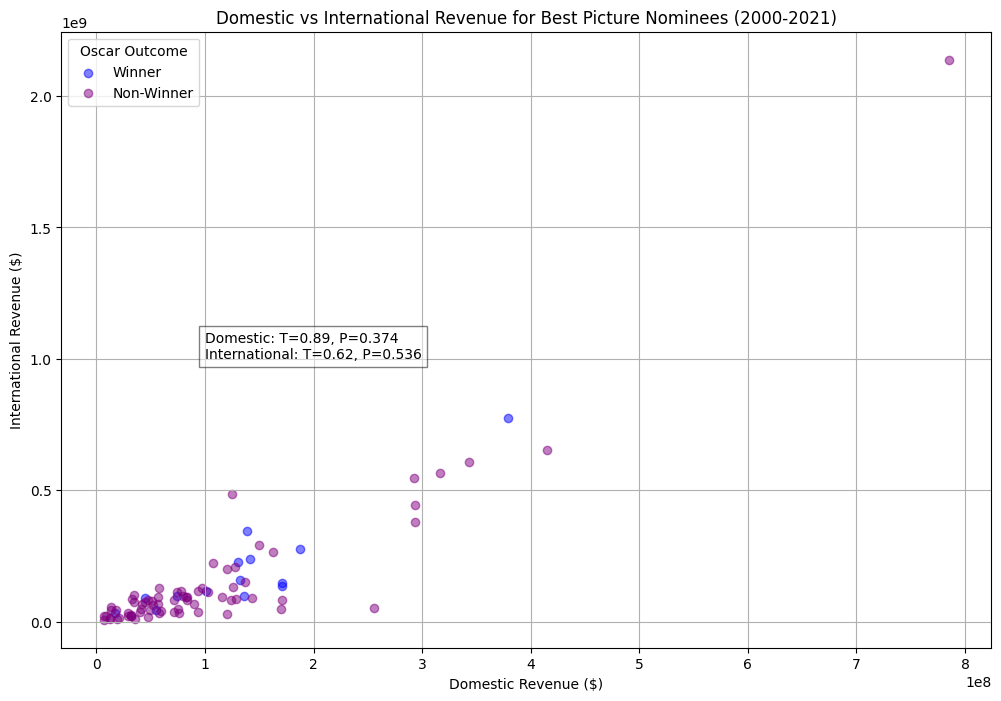

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
final_oscar_nominees = pd.read_csv('final_oscar_nominees_dataset_2000_to_2023.csv')

# Filter Best Picture nominees between 2000 and 2021 and check for necessary columns
best_picture_data_full = final_oscar_nominees[
    (final_oscar_nominees['year_film'] >= 2000) & 
    (final_oscar_nominees['year_film'] <= 2021) & 
    (final_oscar_nominees['category'] == 'best picture')
][['domestic_gross', 'international_gross', 'winner']].dropna()

# Separate the data into winners and non-winners
best_picture_winners_full = best_picture_data_full[best_picture_data_full['winner'] == True]
best_picture_non_winners_full = best_picture_data_full[best_picture_data_full['winner'] == False]

# Perform t-tests for domestic and international revenues
t_stat_domestic, p_value_domestic = ttest_ind(
    best_picture_winners_full['domestic_gross'], 
    best_picture_non_winners_full['domestic_gross']
)
t_stat_international, p_value_international = ttest_ind(
    best_picture_winners_full['international_gross'], 
    best_picture_non_winners_full['international_gross']
)

# Plotting the scatterplot
plt.figure(figsize=(12, 8))
plt.scatter(best_picture_winners_full['domestic_gross'], best_picture_winners_full['international_gross'], color='blue', alpha=0.5, label='Winner')
plt.scatter(best_picture_non_winners_full['domestic_gross'], best_picture_non_winners_full['international_gross'], color='purple', alpha=0.5, label='Non-Winner')
plt.title('Domestic vs International Revenue for Best Picture Nominees (2000-2021)')
plt.xlabel('Domestic Revenue ($)')
plt.ylabel('International Revenue ($)')
plt.legend(title="Oscar Outcome")
plt.grid(True)
plt.text(1e8, 1e9, f'Domestic: T={t_stat_domestic:.2f}, P={p_value_domestic:.3f}\nInternational: T={t_stat_international:.2f}, P={p_value_international:.3f}', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.show()